In [1]:
import numpy as np
import matplotlib.pyplot as plt

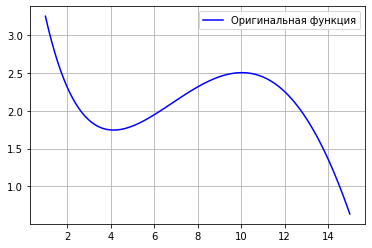

In [2]:
def f(x):
    """
    Заданная функция
    """
    return np.sin(x / 5) * np.exp(x / 10) + 5 * np.exp(-x / 2)
xx = np.linspace(1, 15, 100)
plt.plot(xx, f(xx), label='Оригинальная функция', color='blue')
plt.legend()
plt.grid()

### Полиномиальная регрессия

In [3]:
def regression(n):
    """
    Функция для реализации полиномиальной регрессии
    Использует numpy.linalg.solve для нахождения полиномиальных коэффициентов
    
    Аргументы: 
    n: int
        количество точек (и уравнений в системе)
        
    Возвращает:
    W: ndarray
        вектор полиномиальных коэффициентов
    xx, yy: ndarray
        координаты точек на осях Ох и Оу
        
    """
    xx = np.linspace(1, 15, n)
    yy = f(xx) 
    A = [[xx[j] ** i for i in range(n)] for j in range(n)]
    W = np.linalg.solve(A, yy)
    return W, xx, yy

def polynom(w, xx, n):
    """
    Милая маленькая функция для нахождения значений полинома степени n
    Просто суммируем члены по степеням х
    
    Аргументы:
    w: ndarray
        вектор полиномиальных коэффициентов
    xx: ndarray
        координаты точек на оси Ох
    n: int
        степень полинома
        (сделано для удобства применений в конкретной задаче)
            
    Возвращает:
    res: ndarray
        вектор значений полинома
        
    """
    res = 0
    for i in range(n+1):
        res += w[i] * xx ** i
    return res

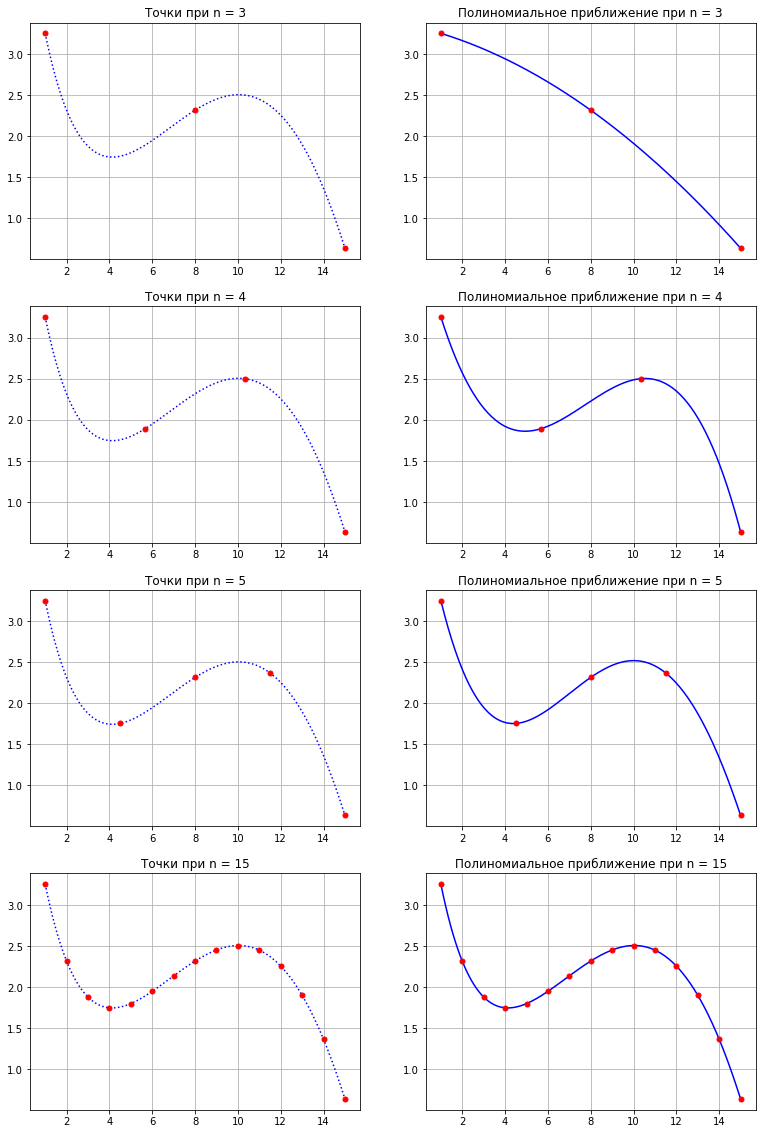

In [4]:
fig, ax = plt.subplots(4, 2, figsize=(13, 20))
ns = (3, 4, 5, 15)
xaxis = np.linspace(1, 15, 250)


for i in range(4):
    n = ns[i]
    W, XX, YY = regression(n)
    ax[i, 0].plot(xaxis, f(xaxis), linestyle=':', color='blue')
    ax[i, 0].plot(XX, YY, linestyle='', marker='o', markersize=5, color='red')
    ax[i, 0].set_title(f'Точки при n = {n}')
    ax[i, 0].grid()
    ax[i, 1].plot(xaxis, polynom(W, xaxis, n-1), color='blue')
    ax[i, 1].plot(XX, YY, linestyle='', marker='o', markersize=5, color='red')
    ax[i, 1].grid()
    ax[i, 1].set_title(f'Полиномиальное приближение при n = {n}')

Как мы видим, полином отлично себя чувствует и при n = 5, и при n = 15. Вообще говоря, для этой функции достаточно n = 4, потому что степень аппроксимирующего полинома тогда будет равна

### Полиномиальная регрессия с шумом

Будем подмешивать шум при вычислении регрессии (это сделано на "фундаменте" прошлой задачи)

In [5]:
def noizy_regression(n, deviation):
    """
    Та же regression(n), но к значениям функции искусственно подмешивается гауссовский шум
    
    Аргументы: 
    n: int
        количество точек (и уравнений в системе)
    deviation:
        стандартное отклонение
        
    Возвращает:
    W: ndarray
        вектор полиномиальных коэффициентов
    xx, yy: ndarray
        координаты точек на осях Ох и Оу
        
    """
    
    noize = np.random.normal(0, deviation, n)
    print(f'Максимальный уровень шума при n = {n}:', max(noize))
    xx = np.linspace(1, 15, n)
    yy = f(xx) + noize
    A = [[xx[j] ** i for i in range(n)] for j in range(n)]
    W = np.linalg.solve(A, yy)
    return W, xx, yy

Максимальный уровень шума при n = 3: 0.0037695425233375203
Максимальный уровень шума при n = 4: 0.022320466027392412
Максимальный уровень шума при n = 5: 0.01439158522652243
Максимальный уровень шума при n = 15: 0.02095756377891673


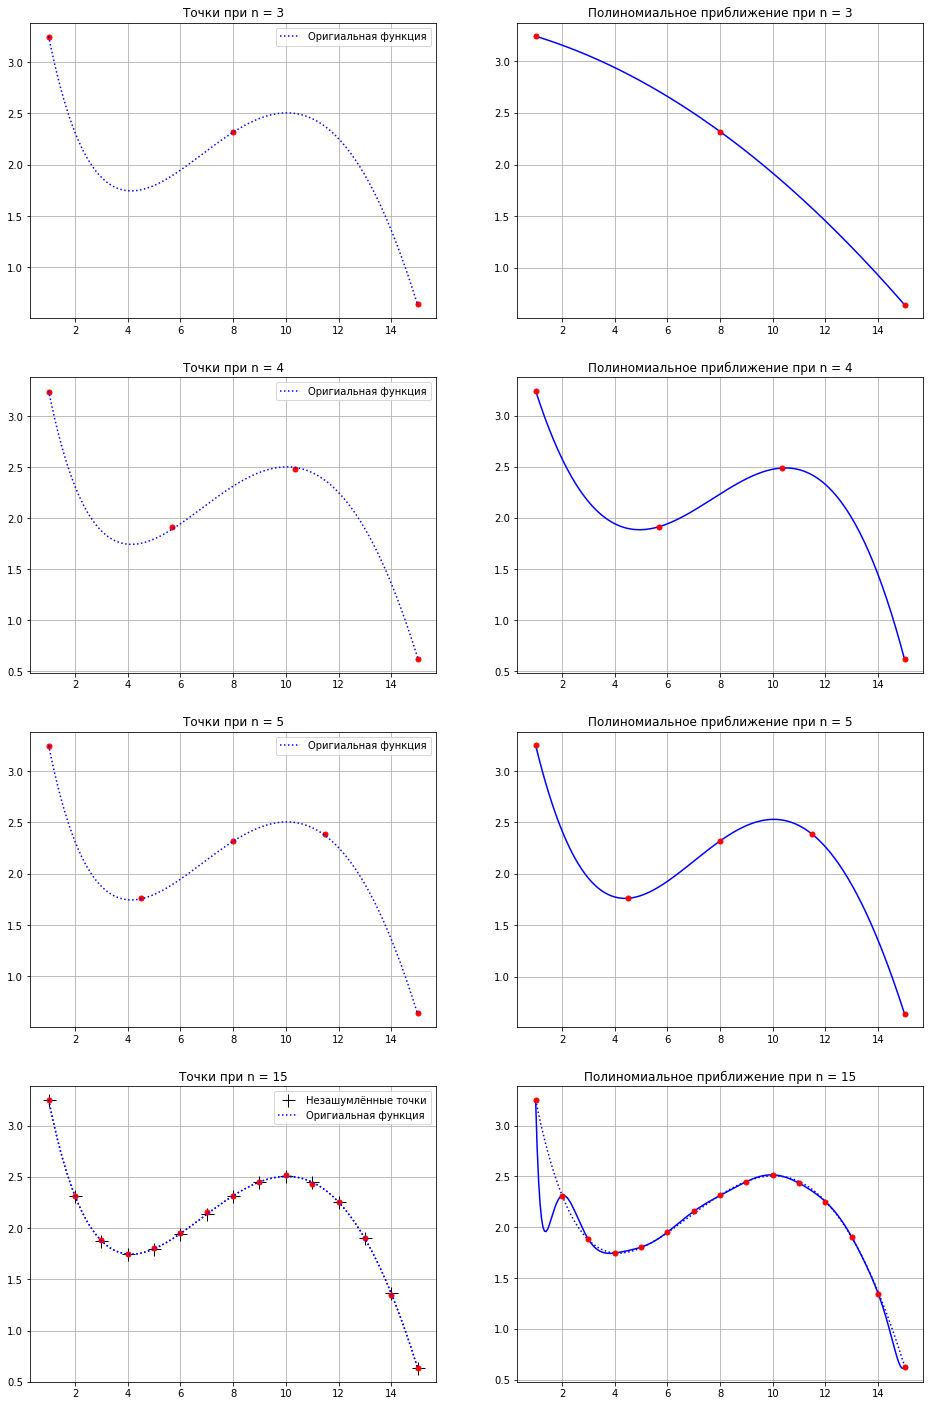

In [6]:
fig, ax = plt.subplots(4, 2, figsize=(16, 25))
ns = (3, 4, 5, 15) # Количество точек. Степенью полинома будет n-1
xaxis = np.linspace(1, 15, 250)

n = 15
W, XX, YY = regression(n)
ax[3, 0].plot(XX, YY, linestyle='', marker='+', markersize=13, markerfacecolor='white', markeredgecolor='black', label='Незашумлённые точки')
ax[3, 0].plot(xaxis, f(xaxis), linestyle=':', color='blue')
ax[3, 0].set_title(f'Точки при n = {n}')
ax[3, 0].legend()
ax[3, 1].plot(xaxis, polynom(W, xaxis, n-1), linestyle=':', color='blue')
ax[3, 1].set_title(f'Полиномиальное приближение при n = {n}')

for i in range(4):
    n = ns[i]
    W, XX, YY = noizy_regression(n, 0.01)
    ax[i, 0].plot(XX, YY, linestyle='', marker='o', markersize=5, color='red')
    ax[i, 0].plot(xaxis, f(xaxis), linestyle=':', label='Оригиальная функция', color='blue')
    ax[i, 0].set_title(f'Точки при n = {n}')
    ax[i, 0].grid()
    ax[i, 0].legend()
    ax[i, 1].plot(xaxis, polynom(W, xaxis, n-1), color='blue')
    ax[i, 1].plot(XX, YY, linestyle='', marker='o', markersize=5, color='red')
    ax[i, 1].set_title(f'Полиномиальное приближение при n = {n}')
    ax[i, 1].grid()



Я доработал графики слева для наглядности. Теперь мы чётко видим, что точки, по которым строится полином, заметно отходят от оригинальной кривой.

Полиномиальное приближение снова начинает походить на оригинальный график при n = 4.

Однако, чем выше степень полинома, тем больше точек нам требуется для его однозначного определения, а значит, тем больше хаоса и шума попадает в выборку.

При идеальных данных в первой задаче полином четырнадцатой степени идеально повторяет форму оригиальной кривой, но даже небольшого шума хватает, чтобы эта идеальность исчезла. Заметнее всего это на концах отрезка, где функция меняется сильнее.

### 3. МНК

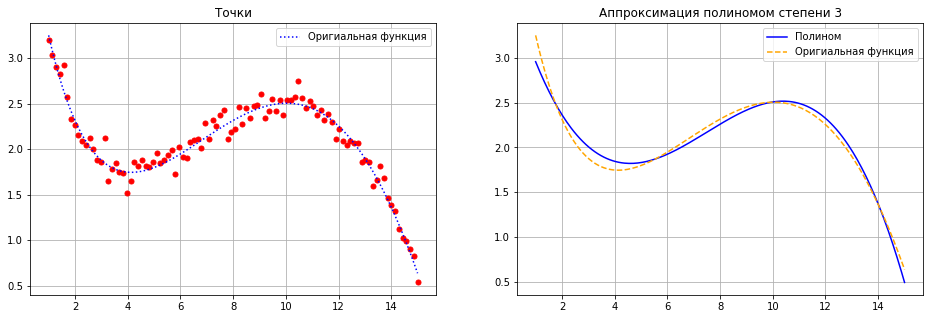

In [7]:
N = 100
noize = np.random.normal(0, 0.1, N)

fig, ax = plt.subplots(1, 2, figsize=(16, 5))
xaxis = np.linspace(1, 15, 250)


XX = np.linspace(1, 15, N)
YY = f(xx) + noize
A = [[xx[j] ** k for k in range(3 + 1)] for j in range(N)]
W = np.linalg.lstsq(A, YY, rcond=None)[0]  # На этот раз без функций, потому что за меня всё сделали в np.linalg

ax[0].plot(XX, YY, linestyle='', marker='o', markersize=5, color='red')
ax[0].plot(xaxis, f(xaxis), linestyle=':', label='Оригиальная функция', color='blue')
ax[0].set_title(f'Точки')
ax[0].grid()
ax[0].legend()
ax[1].plot(xaxis, polynom(W, xaxis, 3), label='Полином', color='blue')
ax[1].plot(xaxis, f(xaxis), linestyle='--', label='Оригиальная функция', color='orange')
ax[1].set_title(f'Аппроксимация полиномом степени {3}')
ax[1].grid()
ax[1].legend()


**Бонус:** полином степени 99 мучается с приближением

Максимальный уровень шума при n = 100: 0.21843070598203812


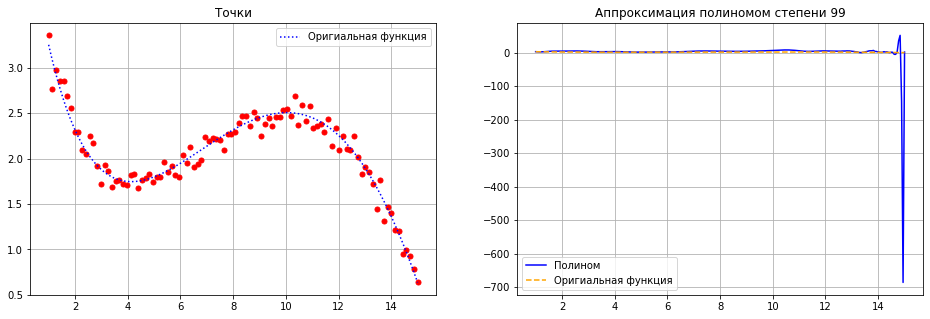

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(16, 5))
xaxis = np.linspace(1, 15, 250)
W, XX, YY = noizy_regression(N, 0.1)

ax[0].plot(XX, YY, linestyle='', marker='o', markersize=5, color='red')
ax[0].plot(xaxis, f(xaxis), linestyle=':', label='Оригиальная функция', color='blue')
ax[0].set_title(f'Точки')
ax[0].grid()
ax[0].legend()
ax[1].plot(xaxis, polynom(W, xaxis, 99), label='Полином', color='blue')
ax[1].plot(xaxis, f(xaxis), linestyle='--', label='Оригиальная функция', color='orange')
ax[1].set_title(f'Аппроксимация полиномом степени {99}')
ax[1].grid()
ax[1].legend()


### Выводы:

- Аппроксимация функций полиномами больших степеней зачастую не имеет смысла, так как они не могут противостоять шуму в данных
- Метод наименьших коэффициентов значительно лучше справляется с зашумлёнными данными, чем полиномиальная регрессия
- Я сдал работу на 4 часа позже дедлайна, зато написал красивую документацию ко всем функциям (и точно ниоткуда не списывал, иначе на это ушло бы меньше четырёх часов)